## Practice: Linear regression from scratch

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate data

In [117]:
np.random.seed(0) # fix the seed for reproducibility

mean = [-1, 1] # mean of normal  distribution. Try others
cov = [[1, -0.75],
       [-0.75, 1]] # covariance of normal distribution

sample = np.random.multivariate_normal(mean, cov, size = 1000) # 1000 normally distributed samples


In [118]:
# add abnormal data

# 5 new points 
new_array = np.random.randint([-100, 5],[-4, 8], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
# 5 new points 
new_array = np.random.randint([0, 2],[10, 6], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
sample

array([[-2.50864293,  2.79159681],
       [-1.12325016,  2.70780094],
       [-3.09246045,  2.40142063],
       ...,
       [ 9.        ,  2.        ],
       [ 7.        ,  5.        ],
       [ 6.        ,  3.        ]])

Create and visualize dataset

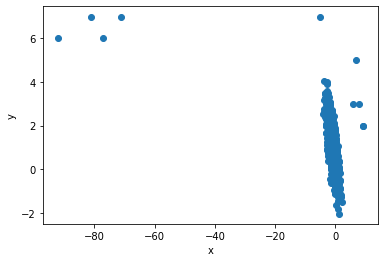

In [119]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [120]:
# Add singular bias feature
X = np.array([np.array([1,val]) for val in x])
X[:5], y[:5]

(array([[ 1.        , -2.50864293],
        [ 1.        , -1.12325016],
        [ 1.        , -3.09246045],
        [ 1.        , -1.94223919],
        [ 1.        , -0.75827911]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [121]:
X.shape, y.shape

((1010, 2), (1010,))

### Define model

Prediction function $y = \theta^Tx$:

In [122]:
def predict(X, theta):
    return np.dot(X,theta)

Cost function as normalized sum of errors on the dataset: $J(\theta) = \frac{1}{2n} \sum\limits_{i=1}^n(y-h_\theta(X))^2$

In [123]:
def computeCost(X, y, theta):
    return sum((y-predict(X, theta))**2) / (2*len(X))

Let's visualize cost function surface in 3d space. For this compute cost function value for a grid-shaped set of theta:

In [124]:
size = 100 # amount of tries for each parameter
limits = (-10,10) # range of values for each parameter
error = np.zeros((size,size)) # empty matrix of errors
for i,w in enumerate(np.linspace(*limits,size)): # for each theta[0] component
    for j,b in enumerate(np.linspace(*limits,size)): # for each theate[1] component
        error[i,j] = computeCost(X, y, np.array([w,b])) # compute cost for each theta

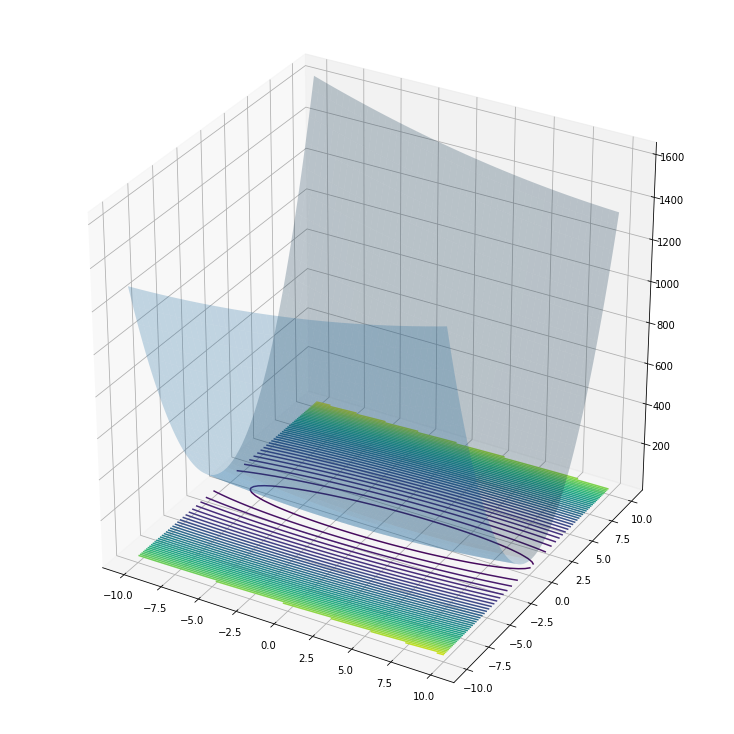

In [125]:
# initialize figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

# create 2d array for each index 
L,K = np.meshgrid(np.linspace(*limits,size),np.linspace(*limits,size))

ax.plot_surface(K,L,Z = error, alpha = 0.25) # plot cost function surface in 3d
plt.contour(K,L,error,50, offset = 0) # plot cost function 2d-projection

## Learn model

Define learning algorithm

Simple gradient descent algorithm: 

$\theta = \theta + \alpha \nabla J(\theta)$

$\nabla J(\theta) = \sum_m(y - h_\theta(X))X$

In [126]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
    #     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    m = len(X)
    history = [] # list of theta values on each iteration 
    cost = [] # list of cost function values on each iteration
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        theta = theta + alpha * (np.sum((y - np.dot(X, theta.T)) * X.T, axis = 1))
        
    return theta, np.array(cost), np.array(history)

Initialize learning

In [127]:
alpha = 0.00001
iters = 800

Learn model

In [128]:
w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization

In [152]:
gd_alpha_ad = alpha
gd_iters_ad = iters
gd_cost_ad = computeCost(X, y, w)
gd_weights_ad = w
gd_batch_size_ad  = len(X)
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

Model`s cost: 0.4540989449569376
Calculated weights:  [ 0.95775086 -0.09022937]


### Check (0,0) solution:

In [153]:
ww = [0,0]
print("Model's cost: ", computeCost(X, y, ww))

Model's cost:  1.0719371669836004


### Visualize model

[-92.   9.]


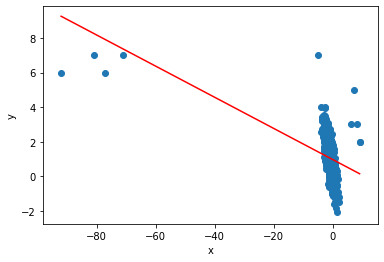

In [154]:
extremes = np.array([np.min(x), np.max(x)])
line = w[0] + extremes * w[1]
print(extremes)
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Visualize learning process

Cost function:

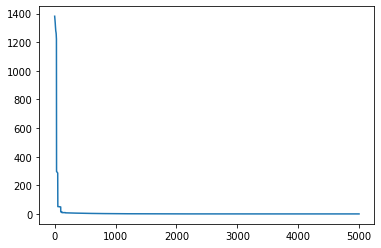

In [155]:
plt.plot(cost)

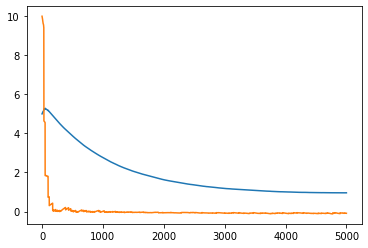

In [156]:
plt.plot(history)

Model's trajectory in parameter's space

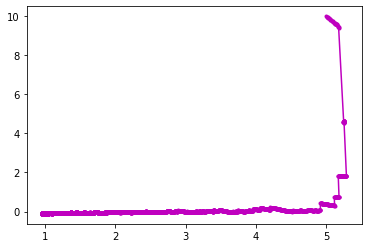

In [157]:
# plt.coutour(K, L, error, 50)
plt.plot(history[:,0], history[:,1], 'm.-')

Model's trajectory on cost function surface:

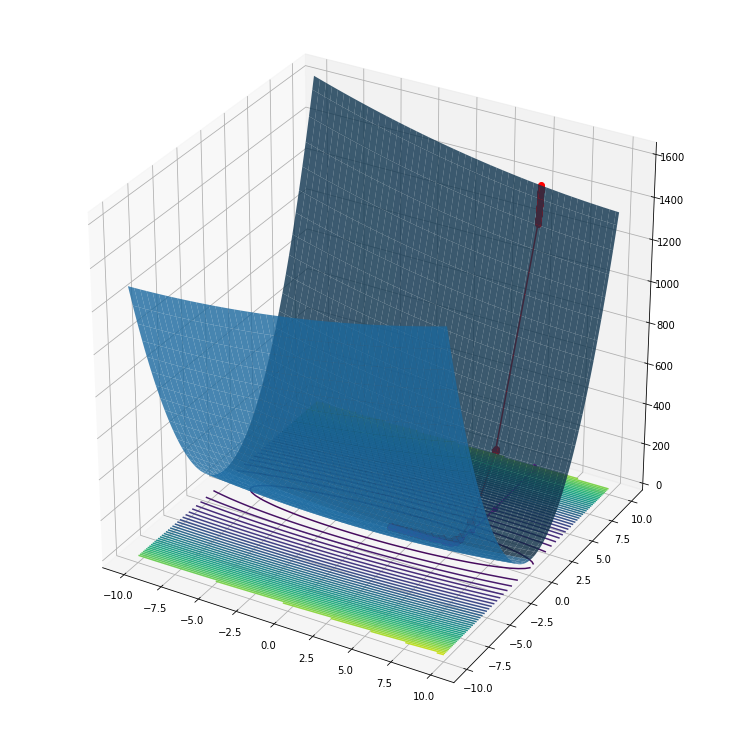

In [158]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

Add stochastic mode for gradient descent:

In [159]:
def StochasticGD(X, y, alpha, iters, batch_size, init = 1):
    theta = np.ones_like(X[0]) * init
    # vars for visualization purpuses
    cost = []
    history = []
    data = [] # for batches 
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        idx = np.random.choice(len(X), replace=False, size=batch_size) # choose random batch from dataset
        data.append((X[idx][:,1], y[idx]))
        theta, _, _ = gradientDescent(X[idx], y[idx],
                                     alpha = alpha,
                                     iters = 1,
                                     init = theta)
    return theta, np.array(cost), np.array(history), np.array(data)

In [160]:
sgd_iters_ad = 5000
sgd_alpha_ad = 0.0001
sgd_batch_size_ad = 10
w, cost, history, data = StochasticGD(X, y,
                                     alpha = sgd_alpha_ad,
                                     iters = sgd_iters_ad,
                                     batch_size = sgd_batch_size_ad,
                                     init = [5,10])

In [161]:
sgd_cost_ad = computeCost(X, y, w)
sgd_weights_ad = w
print("Model's cost: ", computeCost(X, y, w))
print("Calculated weights: ", w)

Model's cost:  0.45372849939004817
Calculated weights:  [ 0.94952467 -0.09092907]


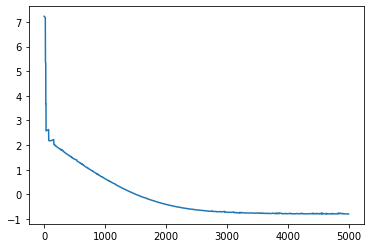

In [162]:
plt.plot(np.log(cost)) # often looks beter in log scale

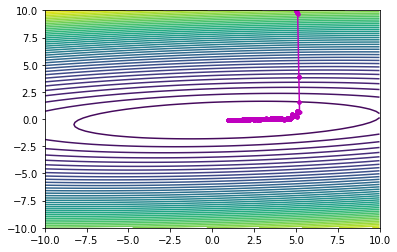

In [163]:
plt.contour(K,L,error,50)
plt.plot(history[:,0], history[:,1],'m.-')

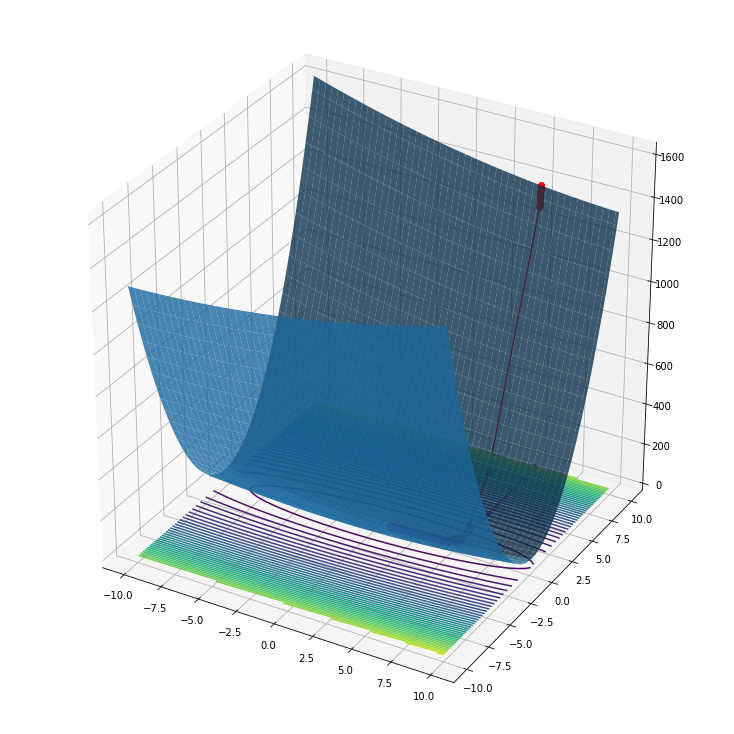

In [164]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

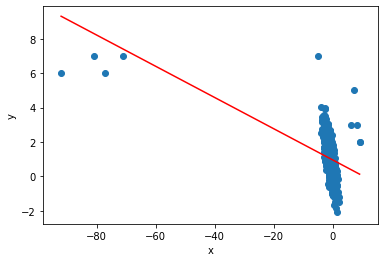

In [165]:
extremes = np.array([np.min(x), np.max(x)])
line =  w[0] + extremes * w[1]
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Let`s compare GD and SGD for our data

In [166]:
import pandas as pd

models = {'Cost_func_val': [gd_cost_ad, sgd_cost_ad],
        'Iters_count': [gd_iters_ad, sgd_iters_ad],
        'Alpha': [gd_alpha_ad, sgd_alpha_ad],
        'Batch_size': [gd_batch_size_ad, sgd_batch_size_ad],
         'Weights': [gd_weights_ad, sgd_weights_ad]}

df = pd.DataFrame(models, columns = ['Cost_func_val','Iters_count', 'Alpha','Batch_size', 'Weights'], index=['GD','SGD'])
print(df)

     Cost_func_val  Iters_count    Alpha  Batch_size  \
GD        0.454099          800  0.00001        1010   
SGD       0.453728         5000  0.00010          10   

                                        Weights  
GD   [0.9577508559447584, -0.09022937034478792]  
SGD  [0.9495246661537474, -0.09092906707091226]  


# Conclusions
If data contains abnormal data in big range:
- cost function become difficult for minimization by gradient descent
by still we can try to choose count of iterations and step of GD and try to find min value of cost func

GD is trying to understand emissions as the result we have bad general predictions that was better with clean normal distribution.

For escaping that - before modeling we need clean data from abnormal data(and normalize in real life, because when we have more than one feature thay can be it different range)

SGD still demands less computation capacity. Even if we need more iters, we use less data for learning.

# Store data for future comparison

In [167]:
%store gd_cost_ad
%store sgd_cost_ad
%store gd_iters_ad
%store sgd_iters_ad
%store gd_alpha_ad
%store sgd_alpha_ad
%store gd_batch_size_ad
%store sgd_batch_size_ad
%store gd_weights_ad
%store sgd_weights_ad

Stored 'gd_cost_ad' (float64)
Stored 'sgd_cost_ad' (float64)
Stored 'gd_iters_ad' (int)
Stored 'sgd_iters_ad' (int)
Stored 'gd_alpha_ad' (float)
Stored 'sgd_alpha_ad' (float)
Stored 'gd_batch_size_ad' (int)
Stored 'sgd_batch_size_ad' (int)
Stored 'gd_weights_ad' (ndarray)
Stored 'sgd_weights_ad' (ndarray)
